<a href="https://colab.research.google.com/github/tottenjordan/data-engineering/blob/master/DictionarySearch_Comparison_jt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 5**

## **MSDS 432**

### **Executive Summary**

This exercise demonstrates and compares the efficiencies of linear, binary, and dictionary searches on both sorted and unsorted data structures. We use a list of 100 random strings. Each string is comprised of 10 random letters. We execute a linear search for 5 names on the unsorted array and then search for those 5 names in an unordered dictionary. Searching through the unordered dictionary takes longer time to execute than linear search on an unsorted array. However, this does not discredit dictionaries. Their strengths are in data structure and performance as the amount of data grows. As dictionaries are hashtables, their average performance is constant, O(1). This means their performance will remain constant even as the data size grows. Linear search’s performance is linear. While it may outperform the dictionary in this example of 100 names, its performance time would decrease as the number of names grew to 1,000, 10,000, etc. 

Another angle to examine dictionaries is the use of ordered and unordered dictionaries. The graph at the end of this notebook shows the execution times for looking for the same string in an ordered and an unordered dictionary. The execution times between the two are consistent. 



In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The link to this file in Google Colab

https://colab.research.google.com/drive/1rWMH6Dj4tFc9T1njSF-WLVuG9U8G03O8#scrollTo=ZBtYb2gpe69M 

# **This notebook compares the execution time for searching names in various data strcutures with various search methods.**

100 random names are generated and stored in an unsorted array. Linear search is performed to find 5 random names and the execution timeis recorded. The 100 names are then put into a dictionary in which the Key is the first letter of the name and the values are every name starting with that letter. A search is performed on the same 5 names and the exectuion time is recorded.

Then the unsorted array of names is sorted. Linear and Binary search is used to find 6 new random names and the exectuion time is recorded. Those same 6 names are searched for i nthe dictionary and the exectuion time is recorded. 

In [0]:
# package management
import numpy as np
import pandas as pd
import random
import string
import time
import matplotlib.pyplot as plt

### **Generate 100 strings with 10 characters each. No duplicates.**

Store them in an unsorted list

In [0]:
def generateName():
  charSet = string.ascii_lowercase 
  length = 10
  return ''.join(random.choice(charSet) for _ in range(length))

def generateNameList(size):
    return [ generateName() for _ in range(size) ]

unsorted_name_array = generateNameList(100)

**Choose 5 random names for searching**

In [0]:
rand1 = random.choice(unsorted_name_array)
rand2 = random.choice(unsorted_name_array)
rand3 = random.choice(unsorted_name_array)
rand4 = random.choice(unsorted_name_array)
rand5 = random.choice(unsorted_name_array)

## **Linear and Binary Search Functions**

In [0]:
# linear search
def linearSearch(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

# binary Search
def binary_search(L, target):
    start = 0
    end = len(L) - 1

    while start <= end:
        middle = (start + end)// 2
        midpoint = L[middle]
        if midpoint > target:
            end = middle - 1
        elif midpoint < target:
            start = middle + 1
        else:
            return midpoint

**Search for each of the 5 names (seperately) and record the execution time**

In [0]:
# 1 
linear_1_unsort_start = time.clock()
linear1 = linearSearch(unsorted_name_array,rand1)
linear_1_unsort_stop = time.clock()
linear_1_unsort_time = linear_1_unsort_stop - linear_1_unsort_start

# 2
linear_2_unsort_start = time.clock()
linear2 = linearSearch(unsorted_name_array, rand2)
linear_2_unsort_stop = time.clock()
linear_2_unsort_time = linear_2_unsort_stop - linear_2_unsort_start

# 3
linear_3_unsort_start = time.clock()
linear3 = linearSearch(unsorted_name_array, rand3)
linear_3_unsort_stop = time.clock()
linear_3_unsort_time = linear_3_unsort_stop - linear_3_unsort_start

# 4
linear_4_unsort_start = time.clock()
linear4 = linearSearch(unsorted_name_array, rand4)
linear_4_unsort_stop = time.clock()
linear_4_unsort_time = linear_4_unsort_stop - linear_4_unsort_start

# 5
linear_5_unsort_start = time.clock()
linear5 = linearSearch(unsorted_name_array, rand5)
linear_5_unsort_stop = time.clock()
linear_5_unsort_time = linear_5_unsort_stop - linear_5_unsort_start

### **Store all 100 names in a dictionary **

This for loop creates a dictionary for all names. The Keys in the dictionary are the first letter of a name. The Values to each Key is a list of names that begin with that Key (letter). 



In [7]:
# empty dictionary
d={}
# create dictionary
for word in unsorted_name_array:
    if(word[0] not in d.keys()):
        d[word[0]]=[]
        d[word[0]].append(word)
    else:
        if(word not in d[word[0]]):
          d[word[0]].append(word)
for k,v in d.items():
        print(k,":",v)

t : ['tcyvpbgjam', 'tvfuekhoig', 'txefmbpyxa', 'tjpgtxjymp', 'tlyjuqhzcq', 'tiewudxcgs', 'tqfquddxbg', 'tfzhmaepmo', 'thhudgfueq']
m : ['mdkbodairy', 'mbkjiuqyms']
b : ['bnqbotvicb', 'bphrlzveqb', 'buqvycddpx', 'bjnjwxopvu', 'bguqjyfpgx', 'bjarzoglke']
y : ['yuftpefzsx', 'yylibaybha', 'ydmfomtqrh', 'yibofribir', 'ytfofzwxkx', 'ymrvfdbqhv']
i : ['isknvxrjhk', 'ibicumqrpx']
x : ['xguipdqpmi', 'xizgktdoxu', 'xfenighovj', 'xvhmzutfyf']
v : ['vztfzwxkjo', 'vyhgnenskb', 'vgjwwpwogb', 'vgixfndkuf']
g : ['gazxpatmdp', 'gtrsfvjqpj', 'gqqctifzlz', 'gcllgygggh', 'gdwzooiikh', 'gvbakyvbok']
o : ['odvnfgfhbu', 'oxfurccucp', 'omaqzbhqxi', 'oqjzjyjopa', 'olntmanuae']
e : ['equbootwwg', 'entdehlben', 'elqrfxupdd', 'epoehwohmj']
z : ['zsvzfguxsh', 'zbcyymmvkt', 'zseuwisxhm']
c : ['caolwtvwdd', 'cwazfulggh']
n : ['najaopivnd', 'nfcwytxeyx', 'nmbrhlxnrg', 'noohvzrojh', 'nwsxshxqdd', 'ndabszozab']
r : ['rkcrnvophq', 'rdyxycgclv']
a : ['ayvqqevvrv', 'akcoskdohb', 'autewdafgg', 'arobnomjqn']
u : ['uzqympuck

### **This function enables searches for names in the unsorted dictionary and returns a list of keys for the name searched**
Only 1 key should be returned

In [0]:
def search_name(v):
    for k,v in d.items():
        if v == search_name:
            print(k)

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

**Search unsorted dictionary and record exectuion time**

In [0]:
# 1
dict_1_search_start = time.clock()
key1 = [k for k, v in d.items() if rand1 in v]
dict_1_search_stop = time.clock()
dict_1_search_time = dict_1_search_stop - dict_1_search_start

# 2
dict_2_search_start = time.clock()
key2 = [k for k, v in d.items() if rand2 in v]
dict_2_search_stop = time.clock()
dict_2_search_time = dict_2_search_stop - dict_2_search_start

# 3
dict_3_search_start = time.clock()
key3 = [k for k, v in d.items() if rand3 in v]
dict_3_search_stop = time.clock()
dict_3_search_time = dict_3_search_stop - dict_3_search_start

# 4
dict_4_search_start = time.clock()
key4 = [k for k, v in d.items() if rand4 in v]
dict_4_search_stop = time.clock()
dict_4_search_time = dict_4_search_stop - dict_4_search_start

# 5
dict_5_search_start = time.clock()
key5 = [k for k, v in d.items() if rand5 in v]
dict_5_search_stop = time.clock()
dict_5_search_time = dict_5_search_stop - dict_5_search_start

## **Dataframe of Execution Times**

In [10]:
# array of random names
arr = [rand1, rand2, rand3, rand4, rand5]

# list of unsorted linear times 
linear_unsort_time = [linear_1_unsort_time,linear_2_unsort_time,linear_3_unsort_time,
                      linear_4_unsort_time,linear_5_unsort_time]

# list of unordered dictionary search times
dict_search_time = [dict_1_search_time,dict_2_search_time,dict_3_search_time,
                    dict_4_search_time,dict_5_search_time]

# df
execution_time_df = pd.DataFrame(data ={'Linear_Unsorted': linear_unsort_time,
                                        'Dictionary': dict_search_time}, index=arr)      
execution_time_df  

,Dictionary,Linear_Unsorted
xizgktdoxu,0.000107,0.000051
bphrlzveqb,0.000076,0.000041
tjpgtxjymp,0.000062,0.000047
lxiaicmyfe,0.000055,0.000042
ymrvfdbqhv,0.000053,0.000052


### **Compare the exectuion times of linear search on an unsorted array and search through an unsorted dictionary**

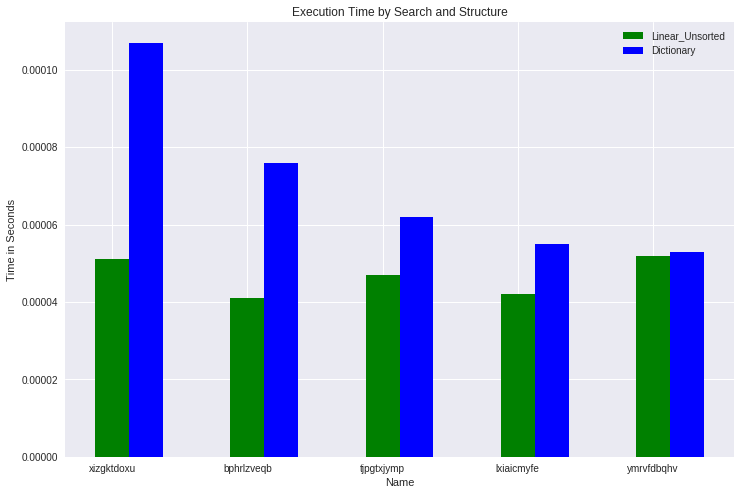

In [12]:
 # bar chart

width = .25
# bar height
bars1 = execution_time_df.Linear_Unsorted
bars2 = execution_time_df.Dictionary

# set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

# start the matplotlib.pyplot figure and add the bar graphs
fig, ax = plt.subplots(figsize=(12,8))
res1 = ax.bar(r1, bars1, width, color='green')
res2 = ax.bar(r2, bars2, width, color="blue")

# add labels, title, and axes ticks
ax.set_title('Execution Time by Search and Structure')
ax.set_ylabel('Time in Seconds')
ax.set_xlabel('Name')
ax.set_xticks(range(execution_time_df.shape[0]))
ax.set_xticklabels(execution_time_df.index.astype(str))

# add legend
ax.legend((res1[0], res2[0]), ('Linear_Unsorted', 'Dictionary'))

# show graph
plt.show()

### **Now, sort the array of 100 names.**

Python's native `sorted()` function is used. This hybrid sort method is called Timsort. It is dervied from merge sort and insertion sort


In [0]:
sorted_names_array = sorted(unsorted_name_array)

### **Now choose the 10th, 30th, 50th, 70th, 90th, and 100th name in the sorted array**






In [0]:
temp_array = [sorted_names_array[9], sorted_names_array[29],sorted_names_array[49],
              sorted_names_array[69],sorted_names_array[89],sorted_names_array[99]]

sorted1 = temp_array[0]
sorted2 = temp_array[1]
sorted3 = temp_array[2]
sorted4 = temp_array[3]
sorted5 = temp_array[4]
sorted6 = temp_array[5]

### **Search for the name at that index in the sorted array using linear and binary search. Record the execution time**

In [0]:
## Linear Search
# 1 
linear_1_sort_start = time.clock()
linear1_sorted = linearSearch(sorted_names_array,sorted1)
linear_1_sort_stop = time.clock()
linear_1_sort_time = linear_1_sort_stop - linear_1_sort_start

#2
linear_2_sort_start = time.clock()
linear2_sorted = linearSearch(sorted_names_array,sorted2)
linear_2_sort_stop = time.clock()
linear_2_sort_time = linear_2_sort_stop - linear_2_sort_start

#3
linear_3_sort_start = time.clock()
linear3_sorted = linearSearch(sorted_names_array,sorted3)
linear_3_sort_stop = time.clock()
linear_3_sort_time = linear_3_sort_stop - linear_3_sort_start

#4
linear_4_sort_start = time.clock()
linear4_sorted = linearSearch(sorted_names_array,sorted4)
linear_4_sort_stop = time.clock()
linear_4_sort_time = linear_4_sort_stop - linear_4_sort_start

#5
linear_5_sort_start = time.clock()
linear5_sorted = linearSearch(sorted_names_array,sorted5)
linear_5_sort_stop = time.clock()
linear_5_sort_time = linear_5_sort_stop - linear_5_sort_start

#6
linear_6_sort_start = time.clock()
linear6_sorted = linearSearch(sorted_names_array,sorted6)
linear_6_sort_stop = time.clock()
linear_6_sort_time = linear_6_sort_stop - linear_6_sort_start
        
############## Binary Search 
#1
binary_1_search_start = time.clock()
binary1_ = binary_search(sorted_names_array,sorted1)
binary_1_search_stop = time.clock()
binary_1_search_time = binary_1_search_stop - binary_1_search_start

#2
binary_2_search_start = time.clock()
binary2_ = binary_search(sorted_names_array,sorted2)
binary_2_search_stop = time.clock()
binary_2_search_time = binary_2_search_stop - binary_2_search_start

#3
binary_3_search_start = time.clock()
binary3_ = binary_search(sorted_names_array,sorted3)
binary_3_search_stop = time.clock()
binary_3_search_time = binary_3_search_stop - binary_3_search_start

#4
binary_4_search_start = time.clock()
binary4_ = binary_search(sorted_names_array,sorted4)
binary_4_search_stop = time.clock()
binary_4_search_time = binary_4_search_stop - binary_4_search_start

#5
binary_5_search_start = time.clock()
binary5_ = binary_search(sorted_names_array,sorted5)
binary_5_search_stop = time.clock()
binary_5_search_time = binary_5_search_stop - binary_5_search_start

#6
binary_6_search_start = time.clock()
binary6_ = binary_search(sorted_names_array,sorted6)
binary_6_search_stop = time.clock()
binary_6_search_time = binary_6_search_stop - binary_6_search_start

Create an ordered dictionary

In [19]:
# empty dictionary
sorted_d={}
# create dictionary
for word in sorted_names_array:
    if(word[0] not in sorted_d.keys()):
        sorted_d[word[0]]=[]
        sorted_d[word[0]].append(word)
    else:
        if(word not in sorted_d[word[0]]):
          sorted_d[word[0]].append(word)
for k,v in sorted_d.items():
        print(k,":",v)

a : ['akcoskdohb', 'arobnomjqn', 'autewdafgg', 'ayvqqevvrv']
b : ['bguqjyfpgx', 'bjarzoglke', 'bjnjwxopvu', 'bnqbotvicb', 'bphrlzveqb', 'buqvycddpx']
c : ['caolwtvwdd', 'cwazfulggh']
d : ['ddcopleutu', 'dkesgicwmq', 'dlyzucbyhx', 'dwbbdaofrr']
e : ['elqrfxupdd', 'entdehlben', 'epoehwohmj', 'equbootwwg']
f : ['fernrihaef', 'fflnxgmlxc', 'fgafvmecci', 'fgivfajrac', 'fiqtefzxgd']
g : ['gazxpatmdp', 'gcllgygggh', 'gdwzooiikh', 'gqqctifzlz', 'gtrsfvjqpj', 'gvbakyvbok']
h : ['hiucljczej', 'hjzbozwrqu']
i : ['ibicumqrpx', 'isknvxrjhk']
j : ['jnrosprdbf', 'jpbxkxinub', 'jpzjjyrzqu', 'jrvldjfgxk']
k : ['knhjeuzyvo', 'kwmnyrfdra', 'kypwyetlmh']
l : ['latroarzap', 'lcoxsvviuv', 'ljkztrvtqf', 'lkhmvtoqun', 'ltypcftohe', 'lxfrjxmhnz', 'lxiaicmyfe']
m : ['mbkjiuqyms', 'mdkbodairy']
n : ['najaopivnd', 'ndabszozab', 'nfcwytxeyx', 'nmbrhlxnrg', 'noohvzrojh', 'nwsxshxqdd']
o : ['odvnfgfhbu', 'olntmanuae', 'omaqzbhqxi', 'oqjzjyjopa', 'oxfurccucp']
p : ['pydlhbceur']
q : ['qoonwnnsin', 'qygpzgkbxt', 'qzpr

### **Search for those names in the unordered dictionary. Record the execution time**

In [0]:
# 1
dict_1_sort_start = time.clock()
key_sort_1 = [k for k, v in sorted_d.items() if sorted1 in v]
dict_1_sort_stop = time.clock()
dict_1_sort_time = dict_1_sort_stop - dict_1_sort_start

# 2
dict_2_sort_start = time.clock()
key_sort_2 = [k for k, v in sorted_d.items() if sorted2 in v]
dict_2_sort_stop = time.clock()
dict_2_sort_time = dict_2_sort_stop - dict_2_sort_start  

# 3
dict_3_sort_start = time.clock()
key_sort_3 = [k for k, v in sorted_d.items() if sorted3 in v]
dict_3_sort_stop = time.clock()
dict_3_sort_time = dict_3_sort_stop - dict_3_sort_start  

# 4
dict_4_sort_start = time.clock()
key_sort_4 = [k for k, v in sorted_d.items() if sorted4 in v]
dict_4_sort_stop = time.clock()
dict_4_sort_time = dict_4_sort_stop - dict_4_sort_start  

# 5
dict_5_sort_start = time.clock()
key_sort_5 = [k for k, v in sorted_d.items() if sorted5 in v]
dict_5_sort_stop = time.clock()
dict_5_sort_time = dict_5_sort_stop - dict_5_sort_start  

# 6
dict_6_sort_start = time.clock()
key_sort_6 = [k for k, v in sorted_d.items() if sorted6 in v]
dict_6_sort_stop = time.clock()
dict_6_sort_time = dict_6_sort_stop - dict_6_sort_start 

### **Sorted Search Execution Times**

In [21]:
# Create Dataframe of execution times
arr2 = [sorted1, sorted2, sorted3, sorted4, sorted5, sorted6]

linear_sort_times = [linear_1_sort_time,linear_2_sort_time,linear_3_sort_time,
                      linear_4_sort_time,linear_5_sort_time, linear_6_sort_time]

binary_sort_times = [binary_1_search_time,binary_2_search_time,binary_3_search_time,
                      binary_4_search_time,binary_5_search_time, binary_6_search_time]

dict_sort_times = [dict_1_sort_time,dict_2_sort_time,dict_3_sort_time,
                    dict_4_sort_time,dict_5_sort_time,dict_6_sort_time]

execution_time_df2 = pd.DataFrame(data ={'Linear_Sorted': linear_sort_times,
                                         'Binary_Sorted': binary_sort_times,
                                        'Dictionary_Sorted': dict_sort_times}, index=arr2)      
execution_time_df2   

,Binary_Sorted,Dictionary_Sorted,Linear_Sorted
buqvycddpx,0.000038,0.000090,0.000074
gtrsfvjqpj,0.000037,0.000059,0.000052
mbkjiuqyms,0.000035,0.000056,0.000041
tfzhmaepmo,0.000042,0.000054,0.000042
xizgktdoxu,0.000044,0.000059,0.000043
zsvzfguxsh,0.000036,0.000053,0.000049


### **Compare the execution times of searching an ordered dictionary with linear and binary search on a sorted array**

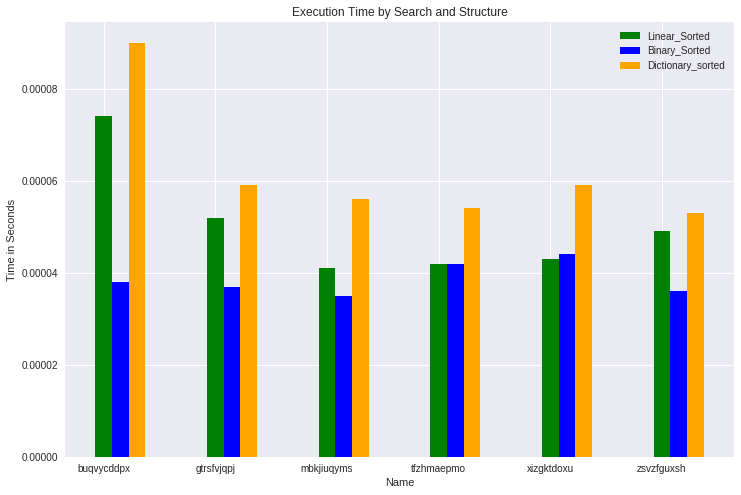

In [23]:
# bar chart

width2 = .15
# bar height
bars3 = execution_time_df2.Linear_Sorted
bars4 = execution_time_df2.Binary_Sorted
bars5 = execution_time_df2.Dictionary_Sorted

# set position of bar on X axis
r3 = np.arange(len(bars3))
r4 = [x + width2 for x in r3]
r5 = [x + width2 for x in r4]

# start the matplotlib.pyplot figure and add the bar graphs
fig, ax = plt.subplots(figsize=(12,8))
res3 = ax.bar(r3, bars3, width2, color='green')
res4 = ax.bar(r4, bars4, width2, color="blue")
res5 = ax.bar(r5, bars5, width2, color="orange")


# add labels, title, and axes ticks
ax.set_title('Execution Time by Search and Structure')
ax.set_ylabel('Time in Seconds')
ax.set_xlabel('Name')
ax.set_xticks(range(execution_time_df2.shape[0]))
ax.set_xticklabels(execution_time_df2.index.astype(str))

# add legend
ax.legend((res3[0], res4[0], res5[0]), ('Linear_Sorted', 'Binary_Sorted', 'Dictionary_sorted'))

# show graph
plt.show()

### **Using the same 6 names, search the unordered dictionary and record the execution time **

In [0]:
# 1
dict_1_unsort_start = time.clock()
key_unsort_1 = [k for k, v in d.items() if sorted1 in v]
dict_1_unsort_stop = time.clock()
dict_1_unsort_time = dict_1_unsort_stop - dict_1_unsort_start

# 2
dict_2_unsort_start = time.clock()
key_unsort_2 = [k for k, v in d.items() if sorted2 in v]
dict_2_unsort_stop = time.clock()
dict_2_unsort_time = dict_2_unsort_stop - dict_2_unsort_start  

# 3
dict_3_unsort_start = time.clock()
key_unsort_3 = [k for k, v in d.items() if sorted3 in v]
dict_3_unsort_stop = time.clock()
dict_3_unsort_time = dict_3_unsort_stop - dict_3_unsort_start  

# 4
dict_4_unsort_start = time.clock()
key_unsort_4 = [k for k, v in d.items() if sorted4 in v]
dict_4_unsort_stop = time.clock()
dict_4_unsort_time = dict_4_unsort_stop - dict_4_unsort_start  

# 5
dict_5_unsort_start = time.clock()
key_unsort_5 = [k for k, v in d.items() if sorted5 in v]
dict_5_unsort_stop = time.clock()
dict_5_unsort_time = dict_5_unsort_stop - dict_5_unsort_start  

# 6
dict_6_unsort_start = time.clock()
key_unsort_6 = [k for k, v in d.items() if sorted6 in v]
dict_6_unsort_stop = time.clock()
dict_6_unsort_time = dict_6_unsort_stop - dict_6_unsort_start

In [27]:
arr3 = [sorted1, sorted2, sorted3, sorted4, sorted5, sorted6]
dict_unsort_times = [dict_1_unsort_time,dict_2_unsort_time,dict_3_unsort_time,
                      dict_4_unsort_time,dict_5_unsort_time, dict_6_unsort_time]

dict_sort_times = [dict_1_sort_time,dict_2_sort_time,dict_3_sort_time,
                    dict_4_sort_time,dict_5_sort_time,dict_6_sort_time]

execution_time_df3 = pd.DataFrame(data ={'Dict_Unsorted': dict_unsort_times,
                                         'Dict_Sorted': dict_sort_times}, index=arr3)      
execution_time_df3

,Dict_Sorted,Dict_Unsorted
buqvycddpx,0.000090,0.000111
gtrsfvjqpj,0.000059,0.000060
mbkjiuqyms,0.000056,0.000056
tfzhmaepmo,0.000054,0.000056
xizgktdoxu,0.000059,0.000055
zsvzfguxsh,0.000053,0.000054


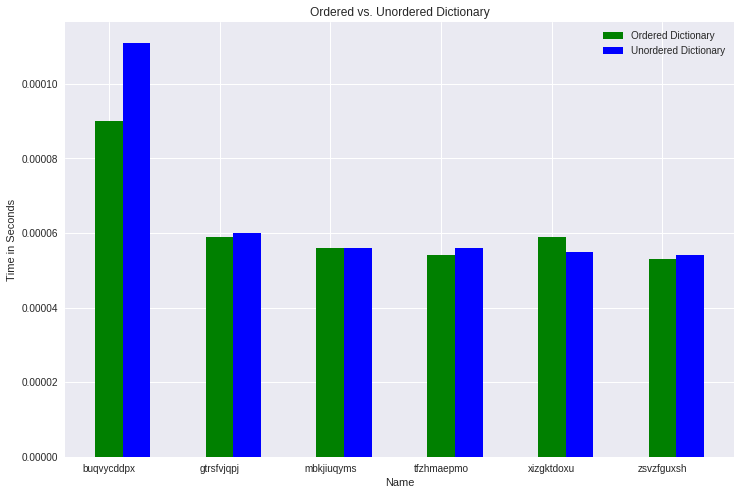

In [29]:
width3 = .25
# bar height
bars6 = execution_time_df3.Dict_Sorted
bars7 = execution_time_df3.Dict_Unsorted

# set position of bar on X axis
r6 = np.arange(len(bars6))
r7 = [x + width3 for x in r6]

# start the matplotlib.pyplot figure and add the bar graphs
fig, ax = plt.subplots(figsize=(12,8))
res6 = ax.bar(r6, bars6, width3, color='green')
res7 = ax.bar(r7, bars7, width3, color="blue")

# add labels, title, and axes ticks
ax.set_title('Ordered vs. Unordered Dictionary')
ax.set_ylabel('Time in Seconds')
ax.set_xlabel('Name')
ax.set_xticks(range(execution_time_df3.shape[0]))
ax.set_xticklabels(execution_time_df3.index.astype(str))

# add legend
ax.legend((res6[0], res7[0]), ('Ordered Dictionary', 'Unordered Dictionary'))

# show graph
plt.show()